In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"D:\Intellipat\ML\Handson\12-03-23-Customer_churn_project\customer_churn.csv")

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
data['TotalCharges']=pd.to_numeric(data['TotalCharges'],errors='coerce')

In [7]:
data = data.dropna()

In [8]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder,StandardScaler, MinMaxScaler
le= LabelEncoder()
ss = StandardScaler()
mm = MinMaxScaler()

In [10]:
obj = []
num = []
for i in data.columns:
    if data[i].dtype == 'object':
       obj.append(i)
    else:
       num.append(i) 

In [11]:
for i in obj:
    le= LabelEncoder()
    data[i] = le.fit_transform(data[i])

In [12]:
df = data[data['Churn']==0].sample(1869)
df = df.append(data[data['Churn']==1])
df['Churn'].value_counts()

C:\Users\akpra\AppData\Local\Temp\ipykernel_14956\1683281824.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data[data['Churn']==1])


0    1869
1    1869
Name: Churn, dtype: int64

In [13]:
# df[num] = ss.fit_transform(df[num])
df[num] = mm.fit_transform(df[num])

<AxesSubplot:xlabel='TotalCharges', ylabel='Count'>

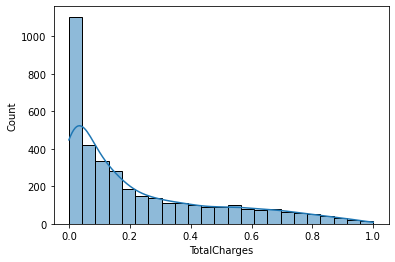

In [14]:
sns.histplot(df['TotalCharges'],kde=True)

In [15]:
df['TotalCharges'].mean()

0.23226636987215246

In [16]:
df['TotalCharges'].std()

0.24975115671418702

In [17]:
df = df.sample(frac=1)

In [18]:
df = df.drop(columns='customerID')

<AxesSubplot:>

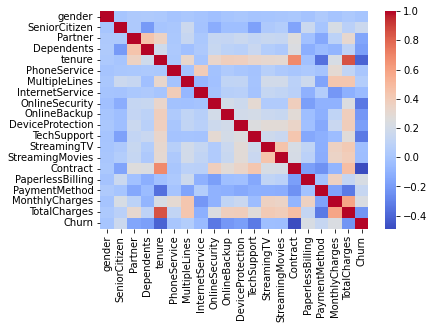

In [19]:
sns.heatmap(df.corr(),cmap='coolwarm')

In [20]:
X = df.iloc[:,:-1]; y = df.iloc[:,-1]

# Feature Selection

## Information Gain

In [21]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

<AxesSubplot:>

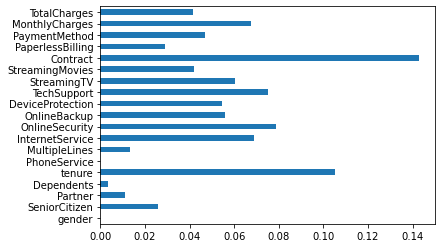

In [22]:
imp = mutual_info_classif(X,y)
feat_imp = pd.Series(imp,df.columns[0:len(df.columns)-1])
feat_imp.plot(kind='barh')

In [23]:
df[feat_imp.sort_values(ascending=False)[:10].index]

,Contract,tenure,OnlineSecurity,TechSupport,InternetService,MonthlyCharges,StreamingTV,OnlineBackup,DeviceProtection,PaymentMethod
3508,2,0.971831,2,2,1,0.948974,2,2,2,0
1080,2,0.436620,1,1,2,0.012506,1,1,1,0
3158,0,0.239437,0,0,0,0.307654,0,0,2,3
3260,0,0.422535,0,2,1,0.596798,0,2,0,2
919,1,0.281690,0,2,1,0.857929,2,2,2,3
...,...,...,...,...,...,...,...,...,...,...
7026,0,0.112676,0,0,0,0.254127,0,0,0,0
573,1,0.774648,0,0,1,0.815408,2,2,0,1
4381,0,0.676056,0,0,1,0.720860,0,0,2,1
4731,1,0.253521,1,1,2,0.011006,1,1,1,3


In [24]:
skb = SelectKBest(mutual_info_classif)
k_best_feat = skb.fit_transform(X,y)

In [25]:
k_best_feat.shape[1]

10

In [26]:
df.iloc[:,:-1].shape[1]

19

In [27]:
pd.DataFrame(k_best_feat)

,0,1,2,3,4,5,6,7,8,9
0,0.971831,1.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,0.948974
1,0.436620,2.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,0.012506
2,0.239437,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,0.307654
3,0.422535,1.0,0.0,2.0,0.0,2.0,0.0,0.0,2.0,0.596798
4,0.281690,1.0,0.0,2.0,2.0,2.0,2.0,1.0,3.0,0.857929
...,...,...,...,...,...,...,...,...,...,...
3733,0.112676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.254127
3734,0.774648,1.0,0.0,2.0,0.0,0.0,2.0,1.0,1.0,0.815408
3735,0.676056,1.0,0.0,0.0,2.0,0.0,2.0,0.0,1.0,0.720860
3736,0.253521,2.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,0.011006


## Chi-Square Test

In [28]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [29]:
skb = SelectKBest(chi2,k=15)
k_best_feat = skb.fit_transform(X,y)

In [30]:
imp = chi2(X,y)
chi2_stats, p_value = imp

In [31]:
# np.argsort(chi2_stats)[::-1]
pd.Series(chi2_stats,index = df.columns[0:len(df.columns)-1]).sort_values(ascending=False)
# pd.Series(p_value,index = df.columns[0:len(df.columns)-1]).sort_values(ascending=False)

Contract            1024.267358
OnlineSecurity       459.690939
TechSupport          430.289137
tenure               189.536409
OnlineBackup         170.638578
DeviceProtection     132.970414
Dependents           100.437175
SeniorCitizen         75.506259
PaperlessBilling      66.666667
Partner               54.281174
TotalCharges          53.545378
PaymentMethod         43.792105
MonthlyCharges        35.620086
MultipleLines          9.414956
InternetService        7.040050
StreamingMovies        5.387576
StreamingTV            5.112217
gender                 0.026245
PhoneService           0.007368
dtype: float64

In [32]:
pd.DataFrame(k_best_feat)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,0.0,0.0,0.971831,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,0.0,0.948974,0.913968
1,0.0,0.0,0.0,0.436620,0.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,0.012506,0.068729
2,0.0,1.0,0.0,0.239437,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,3.0,0.307654,0.099181
3,0.0,0.0,0.0,0.422535,0.0,1.0,0.0,2.0,0.0,2.0,0.0,1.0,2.0,0.596798,0.278827
4,0.0,0.0,0.0,0.281690,0.0,1.0,0.0,2.0,2.0,2.0,1.0,1.0,3.0,0.857929,0.256238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3733,0.0,0.0,0.0,0.112676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.254127,0.044369
3734,0.0,1.0,0.0,0.774648,2.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,0.815408,0.645700
3735,1.0,0.0,0.0,0.676056,2.0,1.0,0.0,0.0,2.0,0.0,0.0,1.0,1.0,0.720860,0.518928
3736,0.0,1.0,1.0,0.253521,0.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,3.0,0.011006,0.039101


## Fisher Score

In [33]:
from sklearn.feature_selection import SelectKBest
from skfeature.function.similarity_based import fisher_score

In [35]:
# rank = fisher_score.fisher_score(X,y)
# pd.Series(rank,index = df.columns[0:len(df.columns)-1]).sort_values(ascending=False)
# rank

## Correlation Cofficient

<AxesSubplot:>

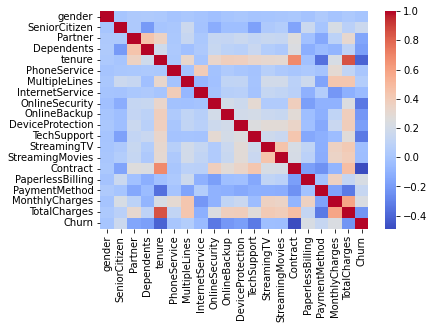

In [36]:
# plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cmap='coolwarm')#,annot=True)

## Variance Threshold

In [37]:
from sklearn.feature_selection import VarianceThreshold

In [38]:
vt = VarianceThreshold()
vt.fit(X)

VarianceThreshold()

In [39]:
pd.Series(vt.get_feature_names_out())[vt.get_support()]

0               gender
1        SeniorCitizen
2              Partner
3           Dependents
4               tenure
5         PhoneService
6        MultipleLines
7      InternetService
8       OnlineSecurity
9         OnlineBackup
10    DeviceProtection
11         TechSupport
12         StreamingTV
13     StreamingMovies
14            Contract
15    PaperlessBilling
16       PaymentMethod
17      MonthlyCharges
18        TotalCharges
dtype: object

## Mean Absolute Difference (MAD)

<BarContainer object of 19 artists>

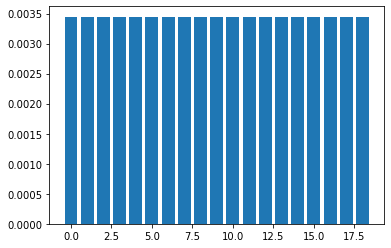

In [40]:
mad = np.sum(np.abs(np.mean(X,axis=0)))/X.shape[0]
plt.bar(np.arange(X.shape[1]),mad)

In [41]:
mad

0.0034466039181159404

## Dispersion Ratio

In [42]:
X = X+1

C:\Users\akpra\anaconda3\lib\site-packages\numpy\core\_methods.py:52: RuntimeWarning: overflow encountered in reduce
  return umr_prod(a, axis, dtype, out, keepdims, initial, where)


<AxesSubplot:>

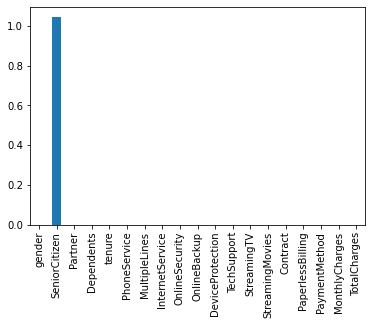

In [43]:
am = np.mean(X,axis=0)
gm = np.power(np.prod(X,axis=0),1/X.shape[0])
dr = am/gm
dr.plot(kind = 'bar')

## Forward Feature Selection

In [44]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [48]:
f_sfs = SequentialFeatureSelector(lr,direction='forward',n_features_to_select=10, cv=6)
f_sfs.fit(X,y)

SequentialFeatureSelector(cv=6, estimator=LogisticRegression(),
                          n_features_to_select=10)

In [49]:
f_sfs.n_features_in_

19

In [50]:
X[f_sfs.get_feature_names_out()]

,tenure,PhoneService,InternetService,OnlineBackup,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
3508,1.971831,2,2,3,3,3,2,1,1.948974,1.913968
1080,1.436620,2,3,2,2,3,2,1,1.012506,1.068729
3158,1.239437,2,1,1,1,1,2,4,1.307654,1.099181
3260,1.422535,2,2,3,3,1,2,3,1.596798,1.278827
919,1.281690,2,2,3,3,2,2,4,1.857929,1.256238
...,...,...,...,...,...,...,...,...,...,...
7026,1.112676,2,1,1,1,1,2,1,1.254127,1.044369
573,1.774648,2,2,3,1,2,1,2,1.815408,1.645700
4381,1.676056,2,2,1,1,1,2,2,1.720860,1.518928
4731,1.253521,2,3,2,2,2,1,4,1.011006,1.039101


In [51]:
lr.fit(X[f_sfs.get_feature_names_out()],y)
y_pred = lr.predict(X[f_sfs.get_feature_names_out()])
lr.score(X[f_sfs.get_feature_names_out()],y)

0.7664526484751204

In [52]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [53]:
confusion_matrix(y,y_pred)

array([[1350,  519],
       [ 354, 1515]], dtype=int64)

In [54]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.72      0.76      1869
           1       0.74      0.81      0.78      1869

    accuracy                           0.77      3738
   macro avg       0.77      0.77      0.77      3738
weighted avg       0.77      0.77      0.77      3738



## Backword Feature Selection

In [55]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [56]:
f_sfs = SequentialFeatureSelector(lr,direction='backward',n_features_to_select=10, cv=6)
f_sfs.fit(X,y)

C:\Users\akpra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\akpra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

SequentialFeatureSelector(cv=6, direction='backward',
                          estimator=LogisticRegression(),
                          n_features_to_select=10)

In [57]:
f_sfs.n_features_in_

19

In [58]:
X[f_sfs.get_feature_names_out()]

,SeniorCitizen,Partner,tenure,PhoneService,InternetService,OnlineBackup,TechSupport,Contract,PaperlessBilling,MonthlyCharges
3508,1.0,1,1.971831,2,2,3,3,3,2,1.948974
1080,1.0,1,1.436620,2,3,2,2,3,2,1.012506
3158,1.0,2,1.239437,2,1,1,1,1,2,1.307654
3260,1.0,1,1.422535,2,2,3,3,1,2,1.596798
919,1.0,1,1.281690,2,2,3,3,2,2,1.857929
...,...,...,...,...,...,...,...,...,...,...
7026,1.0,1,1.112676,2,1,1,1,1,2,1.254127
573,1.0,2,1.774648,2,2,3,1,2,1,1.815408
4381,2.0,1,1.676056,2,2,1,1,1,2,1.720860
4731,1.0,2,1.253521,2,3,2,2,2,1,1.011006


In [59]:
lr.fit(X[f_sfs.get_feature_names_out()],y)
y_pred = lr.predict(X[f_sfs.get_feature_names_out()])
lr.score(X[f_sfs.get_feature_names_out()],y)

0.7683253076511504

In [60]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [61]:
confusion_matrix(y,y_pred)

array([[1361,  508],
       [ 358, 1511]], dtype=int64)

In [62]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.73      0.76      1869
           1       0.75      0.81      0.78      1869

    accuracy                           0.77      3738
   macro avg       0.77      0.77      0.77      3738
weighted avg       0.77      0.77      0.77      3738



## Exhaustive Feature selection

In [63]:
from sklearn.feature_selection import RFE

In [64]:
rfe = RFE(lr,n_features_to_select=10)

In [65]:
rfe.fit(X,y)
y_pred = rfe.predict(X)

In [66]:
rfe.get_feature_names_out()

array(['Dependents', 'tenure', 'PhoneService', 'InternetService',
       'OnlineSecurity', 'TechSupport', 'Contract', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges'], dtype=object)

In [67]:
accuracy_score(y,y_pred)

0.7608346709470305

In [68]:
confusion_matrix(y,y_pred)

array([[1353,  516],
       [ 378, 1491]], dtype=int64)

In [69]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.72      0.75      1869
           1       0.74      0.80      0.77      1869

    accuracy                           0.76      3738
   macro avg       0.76      0.76      0.76      3738
weighted avg       0.76      0.76      0.76      3738



## Lasso Regularization

In [70]:
from sklearn.feature_selection import SelectFromModel

In [71]:
lr.fit(X,y)
model = SelectFromModel(lr,prefit=True)
X_new = model.transform(X)

C:\Users\akpra\anaconda3\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [72]:
model.get_support()

array([False, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False,  True, False, False,  True,
        True])

In [73]:
X.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [75]:
model.estimator.coef_

array([[ 0.03389245,  0.13203779, -0.02010735, -0.22386594, -2.86295637,
        -0.98737451,  0.07997992,  0.20315881, -0.2883891 , -0.14481935,
        -0.05387015, -0.26041082,  0.03100988,  0.01703164, -0.77663943,
         0.30936449,  0.06728671,  2.51162099,  1.05022967]])

In [76]:
X.columns[(model.estimator.coef_ == 0).ravel().tolist()]

Index([], dtype='object')

## Random Forest Importance

In [77]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [78]:
rfc.fit(X,y)
rfc.score(X,y)

0.99812734082397

In [79]:
rfc.feature_importances_

array([0.02557726, 0.01873183, 0.02149678, 0.01977747, 0.15295415,
       0.00553845, 0.02088865, 0.03519316, 0.05724316, 0.03144867,
       0.01951649, 0.04393405, 0.0166639 , 0.01716552, 0.1103178 ,
       0.02409686, 0.0481497 , 0.16252754, 0.16877857])

<AxesSubplot:>

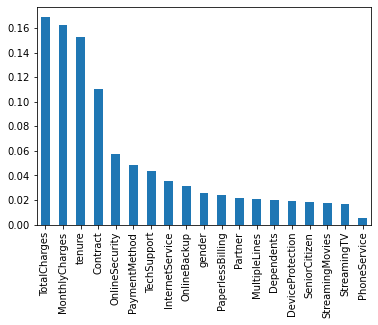

In [80]:
pd.Series(rfc.feature_importances_,X.columns).sort_values(ascending=False).plot(kind='bar')

# Feature Extraction

## PCA

In [81]:
from sklearn.decomposition import PCA
pca = PCA()

In [82]:
X_pca = pca.fit_transform(X)

In [83]:
pca.explained_variance_

array([2.11909117, 1.14210232, 0.97980358, 0.76054973, 0.64124381,
       0.56877487, 0.49691184, 0.46530227, 0.4473944 , 0.35216858,
       0.26186984, 0.24666692, 0.20302158, 0.15383025, 0.09892975,
       0.09246715, 0.04947493, 0.02303596, 0.00411606])

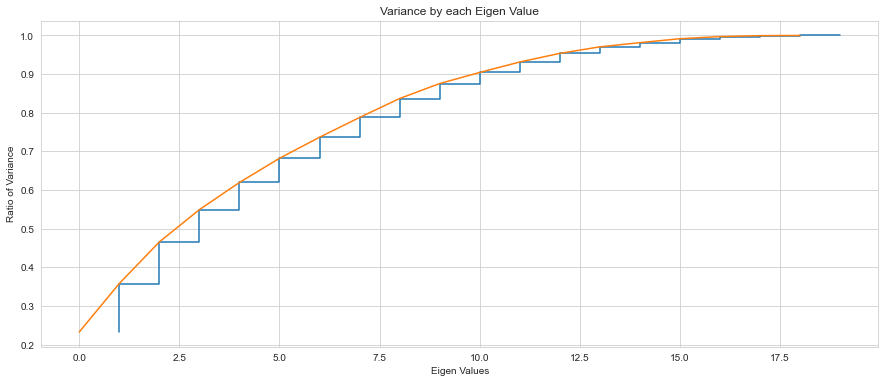

In [84]:
plt.figure(figsize=(15,6))
sns.set_style('whitegrid')
sns.lineplot(x=list(range(1,20)), y=np.cumsum(pca.explained_variance_ratio_), drawstyle='steps-pre')
sns.lineplot(x=list(range(0,19)),y=np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Eigen Values')
plt.ylabel('Ratio of Variance')
plt.title('Variance by each Eigen Value')
plt.show()

In [85]:
pca = PCA(n_components=9)
X_pca = pca.fit_transform(X)

In [86]:
pca.explained_variance_

array([2.11909117, 1.14210232, 0.97980358, 0.76054973, 0.64124381,
       0.56877487, 0.49691184, 0.46530227, 0.4473944 ])

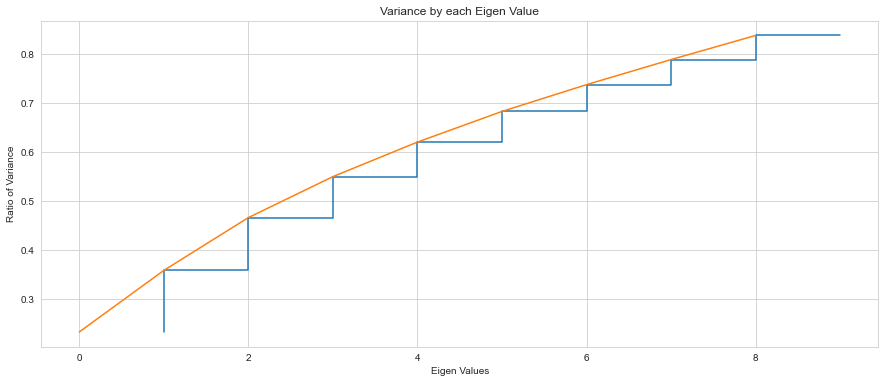

In [87]:
plt.figure(figsize=(15,6))
sns.set_style('whitegrid')
sns.lineplot(x=list(range(1,10)), y=np.cumsum(pca.explained_variance_ratio_), drawstyle='steps-pre')
sns.lineplot(x=list(range(0,9)),y=np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Eigen Values')
plt.ylabel('Ratio of Variance')
plt.title('Variance by each Eigen Value')
plt.show()

## LDA

# Manifold Learning

n_neighbours = max(n_samples/10,1) as per Spectral Embedding documentry

## Locally Linear Embedding

1. Modified
2. Hessian Eigenmapping
3. Local Tangent Space Alignment (LTSA)
<br>method : {'standard', 'hessian', 'modified', 'ltsa'}, default='standard'

In [88]:
from sklearn.manifold import locally_linear_embedding

In [89]:
X_lle,X_error = locally_linear_embedding(X,n_neighbors=150,n_components=3,method='modified')

C:\Users\akpra\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [90]:
X_lle

array([[-0.03402621, -0.01897606, -0.03320451],
       [-0.01406429,  0.02162299, -0.01076159],
       [ 0.01578216,  0.00010476, -0.00142437],
       ...,
       [ 0.00035243, -0.00863738,  0.01875532],
       [-0.00931191,  0.04526046,  0.00192833],
       [-0.01217116,  0.0456064 ,  0.00089608]])

In [91]:
X_error

18.74788166283148

In [92]:
X_lle.shape

(3738, 3)

Text(0.5, 1.0, 'LLE Embedding')

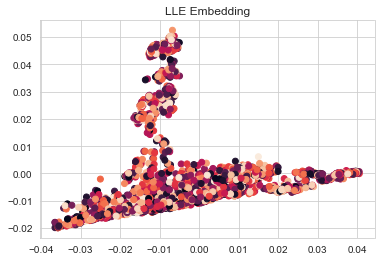

In [93]:
plt.scatter(X_lle[:, 0], X_lle[:, 1],c=np.random.rand(3738))
plt.title("LLE Embedding")

Text(0.5, 0.92, 'LLE Embedding')

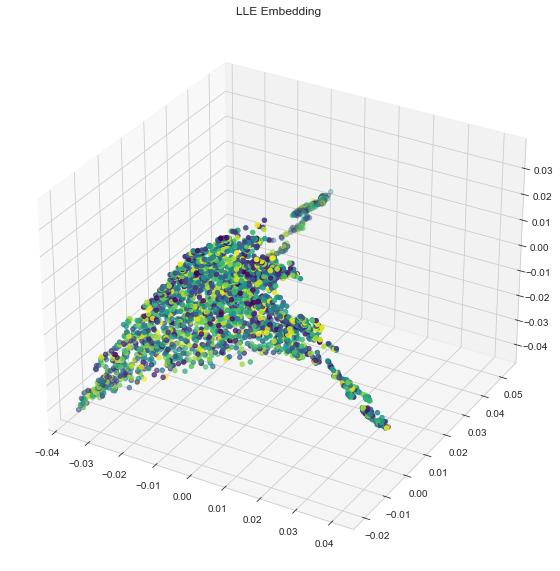

In [94]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_lle[:, 0], X_lle[:, 1],X_lle[:, 2],c=np.random.rand(3738),cmap='viridis')
plt.title("LLE Embedding")

## Isomap

In [95]:
from sklearn.manifold import Isomap

In [96]:
iso = Isomap(n_neighbors=373,n_components=3)

In [97]:
X_iso = iso.fit_transform(X)

In [98]:
X_iso.shape

(3738, 3)

Text(0.5, 1.0, 'Isomap Embedding')

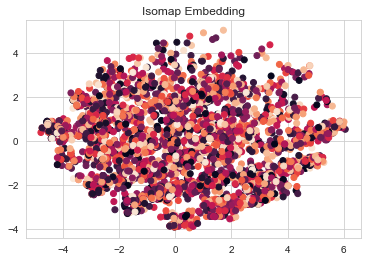

In [99]:
plt.scatter(X_iso[:, 0], X_iso[:, 1],c=np.random.rand(3738))
plt.title("Isomap Embedding")

Text(0.5, 0.92, 'Isomap Embedding')

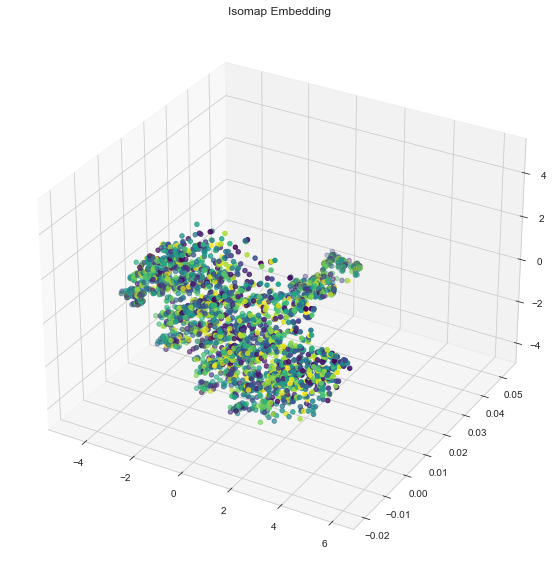

In [100]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_iso[:, 0], X_lle[:, 1],X_iso[:, 2],c=np.random.rand(3738),cmap='viridis')
plt.title("Isomap Embedding")

In [101]:
iso.reconstruction_error()

4.301589268111723

## Spectral Embedding

In [102]:
from sklearn.manifold import SpectralEmbedding

In [103]:
se = SpectralEmbedding(n_components=3)

In [104]:
X_se = se.fit_transform(X)

In [105]:
se.n_neighbors_

373

Text(0.5, 1.0, 'Spectral Embedding')

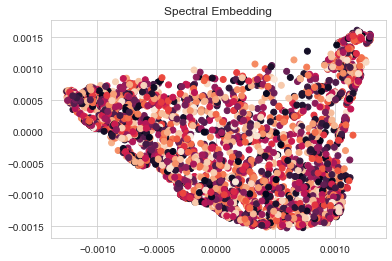

In [106]:
plt.scatter(X_se[:, 0], X_se[:, 1],c=np.random.rand(3738))
plt.title("Spectral Embedding")

Text(0.5, 0.92, 'Spectral Embedding')

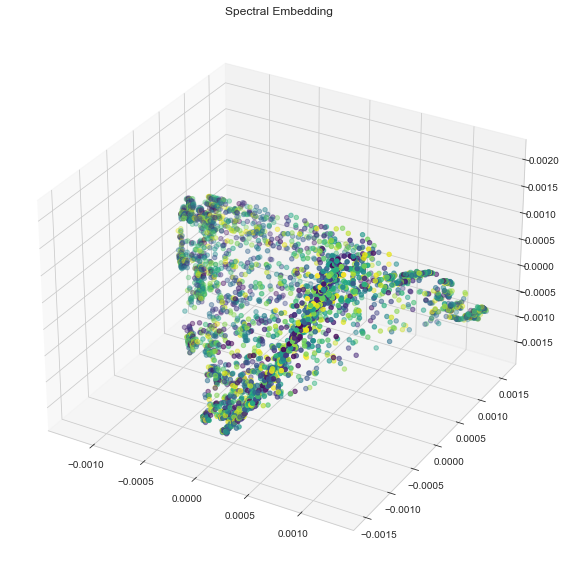

In [107]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_se[:, 0], X_se[:, 1],X_se[:, 2],c=np.random.rand(3738),cmap='viridis')
plt.title("Spectral Embedding")

# Autoencoders

Epoch 1/200
157/157 - 2s - loss: 0.3559 - val_loss: 0.1397 - 2s/epoch - 12ms/step
Epoch 2/200
157/157 - 0s - loss: 0.1179 - val_loss: 0.0948 - 441ms/epoch - 3ms/step
Epoch 3/200
157/157 - 0s - loss: 0.0988 - val_loss: 0.0797 - 412ms/epoch - 3ms/step
Epoch 4/200
157/157 - 0s - loss: 0.0891 - val_loss: 0.0709 - 385ms/epoch - 2ms/step
Epoch 5/200
157/157 - 0s - loss: 0.0815 - val_loss: 0.0656 - 429ms/epoch - 3ms/step
Epoch 6/200
157/157 - 0s - loss: 0.0776 - val_loss: 0.0621 - 312ms/epoch - 2ms/step
Epoch 7/200
157/157 - 0s - loss: 0.0753 - val_loss: 0.0585 - 366ms/epoch - 2ms/step
Epoch 8/200
157/157 - 0s - loss: 0.0720 - val_loss: 0.0570 - 360ms/epoch - 2ms/step
Epoch 9/200
157/157 - 0s - loss: 0.0701 - val_loss: 0.0538 - 423ms/epoch - 3ms/step
Epoch 10/200
157/157 - 0s - loss: 0.0673 - val_loss: 0.0517 - 437ms/epoch - 3ms/step
Epoch 11/200
157/157 - 0s - loss: 0.0664 - val_loss: 0.0501 - 387ms/epoch - 2ms/step
Epoch 12/200
157/157 - 0s - loss: 0.0644 - val_loss: 0.0482 - 410ms/epoch - 

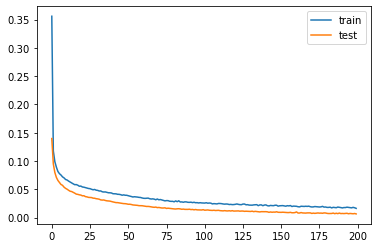

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


C:\Users\akpra\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [48]:
# train autoencoder for classification with with compression in the bottleneck layer
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot
# number of input columns
n_inputs = X.shape[1]
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# scale data
t = MinMaxScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)
# define encoder
visible = Input(shape=(n_inputs,))
# encoder level 1
e = Dense(n_inputs*2)(visible)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# encoder level 2
e = Dense(n_inputs)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# bottleneck
n_bottleneck = round(float(n_inputs) / 2.0)
bottleneck = Dense(n_bottleneck)(e)
# define decoder, level 1
d = Dense(n_inputs)(bottleneck)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# decoder level 2
d = Dense(n_inputs*2)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# output layer
output = Dense(n_inputs, activation='linear')(d)
# define autoencoder model
model = Model(inputs=visible, outputs=output)
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')
# plot the autoencoder
# plot_model(model, 'autoencoder_compress.png', show_shapes=True)
# fit the autoencoder model to reconstruct input
history = model.fit(X_train, X_train, epochs=200, batch_size=16, verbose=2, validation_data=(X_test,X_test))
# plot loss
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
# define an encoder model (without the decoder)
encoder = Model(inputs=visible, outputs=bottleneck)
plot_model(encoder, 'encoder_compress.png', show_shapes=True)
# save the encoder to file
encoder.save('encoder.h5')

In [49]:
# baseline in performance with logistic regression model
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# define dataset
# X, y = make_classification(n_samples=1000, n_features=100, n_informative=10, n_redundant=90, random_state=1)
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# scale data
t = MinMaxScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)
# define model
model = LogisticRegression()
# fit model on training set
model.fit(X_train, y_train)
# make prediction on test set
yhat = model.predict(X_test)
# calculate accuracy
acc = accuracy_score(y_test, yhat)
print(acc)

0.7763371150729336


In [50]:
# evaluate logistic regression on encoded input
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import load_model
# define dataset
# X, y = make_classification(n_samples=1000, n_features=100, n_informative=10, n_redundant=90, random_state=1)
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# scale data
t = MinMaxScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)
# load the model from file
encoder = load_model('encoder.h5')
# encode the train data
X_train_encode = encoder.predict(X_train)
# encode the test data
X_test_encode = encoder.predict(X_test)
# define the model
model = LogisticRegression()
# fit the model on the training set
model.fit(X_train_encode, y_train)
# make predictions on the test set
yhat = model.predict(X_test_encode)
# calculate classification accuracy
acc = accuracy_score(y_test, yhat)
print(acc)

39/39 [==============================] - 0s 1ms/step
0.7722852512155591
